In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import random

Text(0, 0.5, 'Sepal Width')

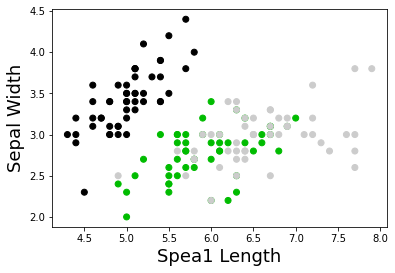

In [9]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

plt.scatter([X[:,0]], X[:,1], c=y, cmap='nipy_spectral')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)


(150,)


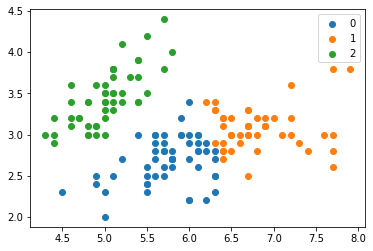

In [18]:
k = 3
n_iter = 300
n = X.shape[0]
m = X.shape[1]

centroids = np.zeros((m, k))
for i in range(0,k):
    centroids[:,i] = X[np.random.randint(0,n)]

        
distances=np.zeros((n,k))
for i in range(0,k):
    c = centroids[:,i]
    norm = np.linalg.norm(X-c, axis=1)
    distances[:,i] = norm


points = np.array([np.argmin(i) for i in distances]) 

print(points.shape)

for i in range(n_iter):
    centroids = np.zeros((k,2))
    for i in range(k):
        c = X[points==i].mean(axis=0)
        centroids[i] = c
    
    for i in range(0,k):
        c = centroids[i]
        norm = np.linalg.norm(X-c, axis=1)
        distances[:,i] = norm
        
points = np.array([np.argmin(i) for i in distances]) 
label = points
    
labels = np.unique(label)
for i in labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

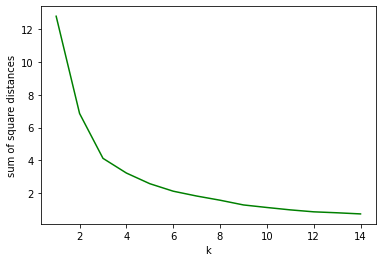

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

minmax = MinMaxScaler()
minmax.fit(X)
data = minmax.transform(X)

ssd = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    ssd.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'green')
plt.xlabel('k')
plt.ylabel('sum of square distances')
plt.show()
